# Derivatives Analytics - Introduction to Object Oriented Programming

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#executive-summary)

**TODO**

### **Resources**: 

**TODO**

# Executive Summary <a name="executive-summary"></a>

**Make intro**

The following sections are organized as follows:

- **TODO**

These are the basic imports that we need to work with NumPy, Pandas and to plot data using Matplotlib functionalities

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for statistical functions
from scipy import stats

# for Matplotlib plotting
import matplotlib.pyplot as plt

# to do inline plots in the Notebook
%matplotlib inline

# for Operating System operations
import os

# Introduction to dates management: `datetime` module <a name="introduction-to-dates"></a>

In [2]:
# for date management
import datetime as dt

In [3]:
today = dt.datetime.today()
today

datetime.datetime(2020, 4, 19, 18, 49, 19, 297526)

In [4]:
type(today)

datetime.datetime

In [5]:
my_birthday = dt.datetime(year=1988,month=6,day=1)
my_birthday

datetime.datetime(1988, 6, 1, 0, 0)

In [6]:
type(my_birthday)

datetime.datetime

In [7]:
time_to_date = today - my_birthday
time_to_date

datetime.timedelta(days=11645, seconds=67759, microseconds=297526)

In [8]:
type(time_to_date)

datetime.timedelta

In [9]:
time_to_date.days

11645

In [10]:
time_to_date.days/365

31.904109589041095

In [11]:
date_string = "18-04-2020"
date_string

'18-04-2020'

In [12]:
type(date_string)

str

In [13]:
isinstance(date_string, str)

True

In [14]:
date = dt.datetime.strptime(date_string, "%d-%m-%Y")
date

datetime.datetime(2020, 4, 18, 0, 0)

In [15]:
type(date)

datetime.datetime

In [16]:
isinstance(date, dt.datetime)

True

In [17]:
date_string_from_dt = date.strftime("%d-%m-%Y")
date_string_from_dt

'18-04-2020'

In [18]:
type(date_string_from_dt)

str

In [19]:
isinstance(date_string_from_dt, str)

True

In [20]:
date + dt.timedelta(days=25)

datetime.datetime(2020, 5, 13, 0, 0)

## Non-financial Introduction to OOP <a name="non-financial-introduction-to-oop"></a>

### Without OOP: a person <a name="nonoopperson"></a> 

In [21]:
def say_your_name(name, surname):
    print("My name is {} {}".format(name, surname))

In [22]:
my_name = "Gabriele"
my_surname = "Pompa"

In [23]:
say_your_name(name=my_name, surname=my_surname)

My name is Gabriele Pompa


In [24]:
def say_country_of_birth(country):
    print("My country of birth is {}".format(country))

In [25]:
my_country = "Italy"

In [26]:
say_country_of_birth(my_country)

My country of birth is Italy


In [27]:
def compute_age(birthdate):
    
    today = dt.datetime.today()  
    birthdate = dt.datetime.strptime(birthdate, "%d-%m-%Y") if isinstance(birthdate, str) else birthdate
    
    next_birthday = dt.datetime(year=today.year, month=birthdate.month, day=birthdate.day)
    
    if today >= next_birthday:
        age = today.year - birthdate.year
    else:
        age = today.year - birthdate.year - 1
        
    return age

In [28]:
my_birthdate = "01-06-1988"
my_birthdate

'01-06-1988'

In [29]:
my_age = compute_age(birthdate=my_birthdate)
my_age

31

In [30]:
def time_to_birthday(birthdate):
    
    today = dt.datetime.today()
    birthdate = dt.datetime.strptime(birthdate, "%d-%m-%Y") if isinstance(birthdate, str) else birthdate
    
    next_birthday = dt.datetime(year=today.year, month=birthdate.month, day=birthdate.day)
    
    return (next_birthday - today).days

In [31]:
days_to_birthday = time_to_birthday(my_birthdate)
days_to_birthday

42

### With OOP: the `Person` class <a name="oopperson"></a> 

In [32]:
class Person(object):
    """
    Person class implementing some typical features of a person.
    
    Attributes:
    -----------
        name (str):                   name string;
        surname (str):                surname string;
        country (str):                country of birth;
        birthdate (str; dt.datetime): date of birth. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        age (int):                    age, as computed by compute_age() method.
    
    Methods:
    --------
        say_your_name: (returns) None
            Prints name and surname.
            
        say_country_of_birth: None
            Prints country of birth.
            
        compute_age: int
            Computes the age, sets self.age attribute and returns it.
            
        time_to_birthday: int
            Computes the number of days left untill next birthdat and return the number.
    
    """
    
    def __init__(self, p_name, p_surname, p_country, p_birthdate):
        self.name      = p_name
        self.surname   = p_surname
        self.country   = p_country
        self.birthdate = dt.datetime.strptime(p_birthdate, "%d-%m-%Y") if isinstance(p_birthdate, str) else p_birthdate
        self.age       = None
    
    def say_your_name(self):
        print("My name is {} {}".format(self.name, self.surname))
        
    def say_country_of_birth(self):
        print("My country of birth is {}".format(self.country))
        
    def compute_age(self):
    
        today = dt.datetime.today()  

        next_birthday = dt.datetime(year=today.year, month=self.birthdate.month, day=self.birthdate.day)

        if today >= next_birthday:
            self.age = today.year - self.birthdate.year
        else:
            self.age = today.year - self.birthdate.year - 1

        return self.age 
    
    def time_to_birthday(self):

        today = dt.datetime.today()

        next_birthday = dt.datetime(year=today.year, month=self.birthdate.month, day=self.birthdate.day)

        return (next_birthday - today).days

In [33]:
gab = Person(p_name = "Gabriele", 
             p_surname = "Pompa", 
             p_country = "Italy", 
             p_birthdate = "01-06-1988")

In [34]:
type(gab)

__main__.Person

In [35]:
gab.name

'Gabriele'

In [36]:
gab.surname

'Pompa'

In [37]:
gab.say_your_name()

My name is Gabriele Pompa


In [38]:
gab.country

'Italy'

In [39]:
gab.say_country_of_birth()

My country of birth is Italy


In [40]:
gab.birthdate

datetime.datetime(1988, 6, 1, 0, 0)

In [41]:
gab.birthdate.strftime("%d-%m-%Y")

'01-06-1988'

In [42]:
gab.age is None

True

In [43]:
gab.compute_age()

31

In [44]:
gab.age

31

In [45]:
gab.time_to_birthday()

42

In [46]:
bill = Person(p_name = "Bill", 
              p_surname = "Gates", 
              p_country = "USA", 
              p_birthdate = "28-10-1955")

In [47]:
type(bill)

__main__.Person

In [48]:
bill.say_your_name()

My name is Bill Gates


## Introduction to OOP: Black-Scholes option pricer <a name="BS-option-pricer"></a>

### Without OOP: a call priced using Black-Scholes model <a name="nonoopperson"></a> 

In [49]:
def call_option_payoff(S,K):
    """
    call_option_payoff(S,K) computes returns the payoff of a call option given the spot price of the underlying asset 
    and strike price 'K'.
    
    Parameters:
        S (float): spot price of the underlying asset;
        K (float): strike price;
    
    Returns:
        payoff (float): call option payoff;
    """
    return max(0.0, S - K)


In [50]:
def call_option_price(S, K, T, r, q, sigma):
    """
    call_option_price(S, K, T, r, q, sigma) computes and returns the exact price of a call option 
    of time to maturity 'T' and strike price 'K' given the spot price of the underlying asset 'S', 
    the continuosly compounded short-rate 'r', continuosly compounded dividend yield 'q' and volatility of the 
    underlying asset 'sigma'.

    Parameters:
        S (float):     spot price of the underlying asset;
        K (float):     strike price;
        T (float):     time to maturity (in years);
        r (float):     continuously compounded short-rate;
        q (float):     continuously compounded dividend yield;
        sigma (float): volatility of underlying asset;
        
    Returns:
        price (float): call price;

    """
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    price = (S * np.exp(-q * T) * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))

    return price

In [51]:
S_0            = 100.0
short_rate     = 0.05 # 5% per year
dividend_yield = 0.02 # 2% per year
volatility     = 0.2  # 20% per year

In [52]:
T_strip = np.array([0.05, 0.1, 0.25, 0.5, 0.75, 1.0])
T_strip

array([0.05, 0.1 , 0.25, 0.5 , 0.75, 1.  ])

In [53]:
K_strip = np.linspace(80, 120, 100)
K_strip = np.append(K_strip, S_0)
K_strip = np.sort(K_strip)
K_strip

array([ 80.        ,  80.4040404 ,  80.80808081,  81.21212121,
        81.61616162,  82.02020202,  82.42424242,  82.82828283,
        83.23232323,  83.63636364,  84.04040404,  84.44444444,
        84.84848485,  85.25252525,  85.65656566,  86.06060606,
        86.46464646,  86.86868687,  87.27272727,  87.67676768,
        88.08080808,  88.48484848,  88.88888889,  89.29292929,
        89.6969697 ,  90.1010101 ,  90.50505051,  90.90909091,
        91.31313131,  91.71717172,  92.12121212,  92.52525253,
        92.92929293,  93.33333333,  93.73737374,  94.14141414,
        94.54545455,  94.94949495,  95.35353535,  95.75757576,
        96.16161616,  96.56565657,  96.96969697,  97.37373737,
        97.77777778,  98.18181818,  98.58585859,  98.98989899,
        99.39393939,  99.7979798 , 100.        , 100.2020202 ,
       100.60606061, 101.01010101, 101.41414141, 101.81818182,
       102.22222222, 102.62626263, 103.03030303, 103.43434343,
       103.83838384, 104.24242424, 104.64646465, 105.05

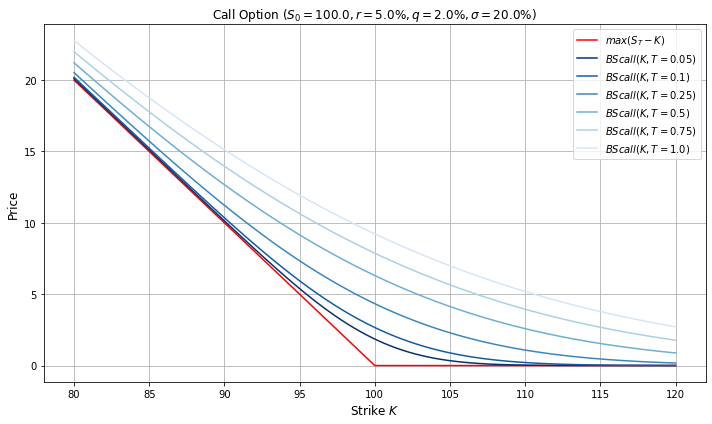

In [54]:
# color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues_r(np.linspace(0,1,len(T_strip)+1)))

# define the figure
fig, ax = plt.subplots(figsize=(10,6))

# plot the red payoff line for different strikes
ax.plot(K_strip, [call_option_payoff(S_0, K) for K in K_strip], 
        'r-', lw=1.5, label="$max(S_T-K)$")

# plot the price for different strikes, one line for each different time to maturity 
for T in T_strip:
    ax.plot(K_strip, [call_option_price(S_0, K, T, short_rate, dividend_yield, volatility) for K in K_strip], 
            '-', lw=1.5, label="$BScall(K, T={})$".format(T))

# set axis labels 
ax.set_xlabel('Strike $K$', fontsize=12) 
ax.set_ylabel('Price', fontsize=12) 

# set title
ax.set_title("Call Option ($S_0={}, r={}\%, q={}\%, \sigma={}\%)$".format(S_0, short_rate*100, dividend_yield*100, volatility*100), 
             fontsize=12) 

# add the legend
ax.legend(loc='upper right', ncol=1)

# add a gride to ease visualization
plt.grid(True)

# show the plot
fig.tight_layout()
plt.show()

### With OOP: the `BSCall` class <a name="bscall"></a> 

In [55]:
class CallOption(object):
    """
    CallOption class implementing payoff and pricing of a european call option.
    
    Attributes:
    -----------
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        q (float):                continuously compounded dividend yield;
        sigma (float):            volatility of underlying asset;
    
    Methods:
    --------            
        time_to_maturity: float
            Computes the time to maturity and returns it.
            
        payoff: float
            Computes the payoff of the option and returns it

        price: float
            Computes the exact price of the option and returns it

    """
    
    # constructor
    def __init__(self, S_t, K, t, T, r, q, sigma):
        self.S     = S_t
        self.K     = K
        self.t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.tau   = self.time_to_maturity()
        self.r     = r
        self.q     = q
        self.sigma = sigma
        
    # string representation
    def __repr__(self):
        return r"CallOption(S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, q={:.1f}%, sigma={:.1f}%)".\
                format(self.S, self.K, self.t.strftime("%d-%m-%Y"), self.T.strftime("%d-%m-%Y"), self.tau, 
                       self.r*100, self.q*100, self.sigma*100)
      
    # time to maturity calculation
    def time_to_maturity(self):
        return (self.T - self.t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        return max(0.0, self.S - self.K)

    # price calculation
    def price(self):

        d1 = (np.log(self.S / self.K) + (self.r - self.q + 0.5 * self.sigma ** 2) * self.tau) / (self.sigma * np.sqrt(self.tau))
        d2 = (np.log(self.S / self.K) + (self.r - self.q - 0.5 * self.sigma ** 2) * self.tau) / (self.sigma * np.sqrt(self.tau))

        price = self.S * np.exp(-self.q * self.tau) * stats.norm.cdf(d1, 0.0, 1.0) - \
                self.K * np.exp(-self.r * self.tau) * stats.norm.cdf(d2, 0.0, 1.0)

        return price    

In [56]:
call = CallOption(S_t=100.0, K=90, t="19-04-2020", T="31-12-2020", r=0.05, q=0.02, sigma=0.2)

In [57]:
call

CallOption(S_t=100.0, K=90.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, q=2.0%, sigma=20.0%)

In [58]:
type(call)

__main__.CallOption

In [59]:
call.S

100.0

In [60]:
call.K

90

In [61]:
call.T

datetime.datetime(2020, 12, 31, 0, 0)

In [62]:
call.tau

0.7013698630136986

In [63]:
call.payoff()

10.0

In [64]:
call.price()

13.721822332545926

In [65]:
def plotter(call_option, K_strip, tau_strip):
    """
    plotter(call_option, K_strip, tau_strip) plot call option prices for strikes and maturities in 'K_strip' and 'tau_strip',
    respectively.

    Parameters:
        call_option (CallOption): instance of CallOption class;
        K_strip (List):           list of strike prices;
        tau_strip (List):           list of times to maturity (in years);
        
    Returns:
        None;

    """
    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues_r(np.linspace(0,1,len(tau_strip)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
    
    # auxiliary variables
    numK = len(K_strip)
    numT = len(tau_strip)

    # plot the red payoff line for different strikes
    payoff = np.zeros(numK)
    for i in np.arange(numK):
        call_option.K = K_strip[i] # reset of strike price
        payoff[i] = call_option.payoff()

    ax.plot(K_strip, payoff, 'r-', lw=1.5, label="$max(S_T-K)$")

    # plot the price for different strikes, one line for each different time to maturity 
    for i in np.arange(numT):
        
        call_option.tau = tau_strip[i]
        price = np.zeros(numK)
        
        for j in np.arange(numK):
            call_option.K = K_strip[j] # reset of strike price
            price[j] = call_option.price()
        
        ax.plot(K_strip, price, '-', lw=1.5, label="$BScall(K, tau={})$".format(call_option.tau))

    # set axis labels 
    ax.set_xlabel('Strike $K$', fontsize=12) 
    ax.set_ylabel('Price', fontsize=12) 

    # set title
    ax.set_title("Call Option ($S_t={}, r={}\%, q={}\%, \sigma={}\%)$".\
                 format(call_option.S, call_option.r, call_option.q, call_option.sigma), fontsize=12) 

    # add the legend
    ax.legend(loc='upper right', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

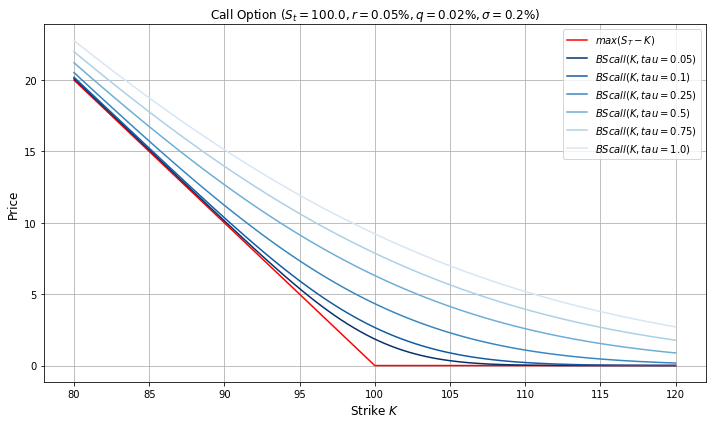

In [66]:
plotter(call, K_strip, T_strip)

in plotter `K` and `tau` attributes have been intentionally changed. But this might be something error prone.. name hiding

In [67]:
import math

In [68]:
class CallOption(object):
    """
    CallOption class implementing payoff and pricing of a european call option.
    
    Attributes:
    -----------
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        q (float):                continuously compounded dividend yield;
        sigma (float):            volatility of underlying asset;
    
    Methods:
    --------            
        time_to_maturity: float
            Computes the time to maturity and returns it.
            
        payoff: float
            Computes the payoff of the option and returns it

        price: float
            Computes the exact price of the option and returns it

    """
    
    def __init__(self, S_t, K, t, T, r, q, sigma):
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.time_to_maturity()
        self.__r     = r
        self.__q     = q
        self.__sigma = sigma
        
    def __repr__(self):
        return r"CallOption(S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, q={:.1f}%, sigma={:.1f}%)".\
                format(self.__S, self.__K, self.__t.strftime("%d-%m-%Y"), self.__T.strftime("%d-%m-%Y"), self.__tau, 
                       self.__r*100, self.__q*100, self.__sigma*100)
    
    # getters
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_q(self):
        return self.__q

    def get_sigma(self):
        return self.__sigma
    
    # setters
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_q(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity calculation
    def time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        return max(0.0, self.__S - self.__K)

    # price calculation
    def price(self):

        d1 = (np.log(self.__S / self.__K) + (self.__r - self.__q + 0.5 * self.__sigma ** 2) * self.__tau) / (self.__sigma * np.sqrt(self.__tau))
        d2 = (np.log(self.__S / self.__K) + (self.__r - self.__q - 0.5 * self.__sigma ** 2) * self.__tau) / (self.__sigma * np.sqrt(self.__tau))

        price = self.__S * np.exp(-self.__q * self.__tau) * stats.norm.cdf(d1, 0.0, 1.0) - \
                self.__K * np.exp(-self.__r * self.__tau) * stats.norm.cdf(d2, 0.0, 1.0)

        return price    

In [69]:
call = CallOption(S_t=100.0, K=90, t="19-04-2020", T="31-12-2020", r=0.05, q=0.02, sigma=0.2)

In [70]:
call

CallOption(S_t=100.0, K=90.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, q=2.0%, sigma=20.0%)

In [71]:
type(call)

__main__.CallOption

In [72]:
call.__S

AttributeError: 'CallOption' object has no attribute '__S'

In [73]:
call.get_S()

100.0

In [74]:
call.set_S(105)

In [75]:
call.get_S()

105

In [76]:
call.get_t()

datetime.datetime(2020, 4, 19, 0, 0)

In [77]:
call.get_T()

datetime.datetime(2020, 12, 31, 0, 0)

In [78]:
call.get_tau()

0.7013698630136986

In [79]:
call.set_t("01-06-2020")

In [80]:
call.get_t()

datetime.datetime(2020, 6, 1, 0, 0)

In [81]:
call.__update_tau()

AttributeError: 'CallOption' object has no attribute '__update_tau'

In [82]:
call.get_tau() # tau gets updated automatically

0.5835616438356165

In [83]:
(call.get_T() - call.get_t()).days / 365 # consistency check

0.5835616438356165

In [84]:
call.set_tau(1.0)

In [85]:
call.get_tau()

1.0

In [86]:
call.__update_T()

AttributeError: 'CallOption' object has no attribute '__update_T'

In [87]:
call.get_T() # expiration date gets updated automatically

datetime.datetime(2021, 6, 1, 0, 0)

In [88]:
(call.get_T() - call.get_t()).days / 365 |# consistency check

SyntaxError: invalid syntax (<ipython-input-88-7ae69be5b5ab>, line 1)

In [89]:
call = CallOption(S_t=100.0, K=90, t="19-04-2020", T="31-12-2020", r=0.05, q=0.02, sigma=0.2)

In [90]:
call

CallOption(S_t=100.0, K=90.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, q=2.0%, sigma=20.0%)

In [91]:
def plotter(call_option, K_strip, tau_strip):
    """
    plotter(call_option, K_strip, tau_strip) plot call option prices for strikes and maturities in 'K_strip' and 'tau_strip',
    respectively.

    Parameters:
        call_option (CallOption): instance of CallOption class;
        K_strip (List):           list of strike prices;
        tau_strip (List):           list of times to maturity (in years);
        
    Returns:
        None;

    """
    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues_r(np.linspace(0,1,len(tau_strip)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
    
    # auxiliary variables
    numK = len(K_strip)
    numT = len(tau_strip)

    # plot the red payoff line for different strikes
    payoff = np.zeros(numK)
    for i in np.arange(numK):
        call_option.set_K(K_strip[i]) # reset of strike price
        payoff[i] = call_option.payoff()

    ax.plot(K_strip, payoff, 'r-', lw=1.5, label="$max(S_T-K)$")

    # plot the price for different strikes, one line for each different time to maturity 
    for i in np.arange(numT):
        
        call_option.set_tau(tau_strip[i])
        price = np.zeros(numK)
        
        for j in np.arange(numK):
            call_option.set_K(K_strip[j]) # reset of strike price
            price[j] = call_option.price()
        
        ax.plot(K_strip, price, '-', lw=1.5, label="$BScall(K, tau={})$".format(call_option.get_tau()))

    # set axis labels 
    ax.set_xlabel('Strike $K$', fontsize=12) 
    ax.set_ylabel('Price', fontsize=12) 

    # set title
    ax.set_title("Call Option ($S_t={}, r={}\%, q={}\%, \sigma={}\%)$".\
                 format(call_option.get_S(), call_option.get_r(), call_option.get_q(), call_option.get_sigma()), fontsize=12) 

    # add the legend
    ax.legend(loc='upper right', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

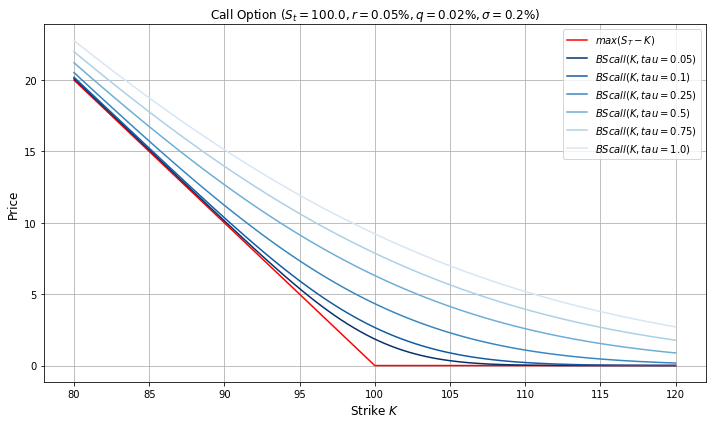

In [92]:
plotter(call, K_strip, T_strip)